# Library

In [1]:
import copy
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
df = pd.read_csv('./Data/heart.csv')
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data Description
* 심장마비 데이터  

< Target : output >

< Feature >  
* age : 나이
* sex : 성별
* cp : 심장 통증
  - 0 : 통증이 없음
  - 1 : 전형적인 협심증
  - 2 : 비정형 협심증
  - 3 : 협심증 외 통증
* trtbps : 안정시 혈압
* chol : 콜레스테롤 수치
* fbs : 공복 혈당
  - 0 : 120 이하
  - 1 : 120 초과
* restecg : 심전도
  - 0 : 정상
  - 1 : 이상 파형
  - 2 : 좌심실 비대
* thalachh : 최대 심박수
* exng : 운동 유발 협심증
  - 0 : 이상 없음
  - 1 : 증상 있음
* oldpeak
* slp : 말의 어눌함 정도
  - 0 : 정상
  - 1 : 약간 심함
  - 2 : 심함
* caa : 심장병을 판별하는 데 중요한 혈관의 수
* thall : 빈혈 유무

# Missing Data

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# EDA

## Outtlier

In [5]:
num_index = df.select_dtypes(exclude= 'object').columns
print(len(num_index))
num_index

14


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


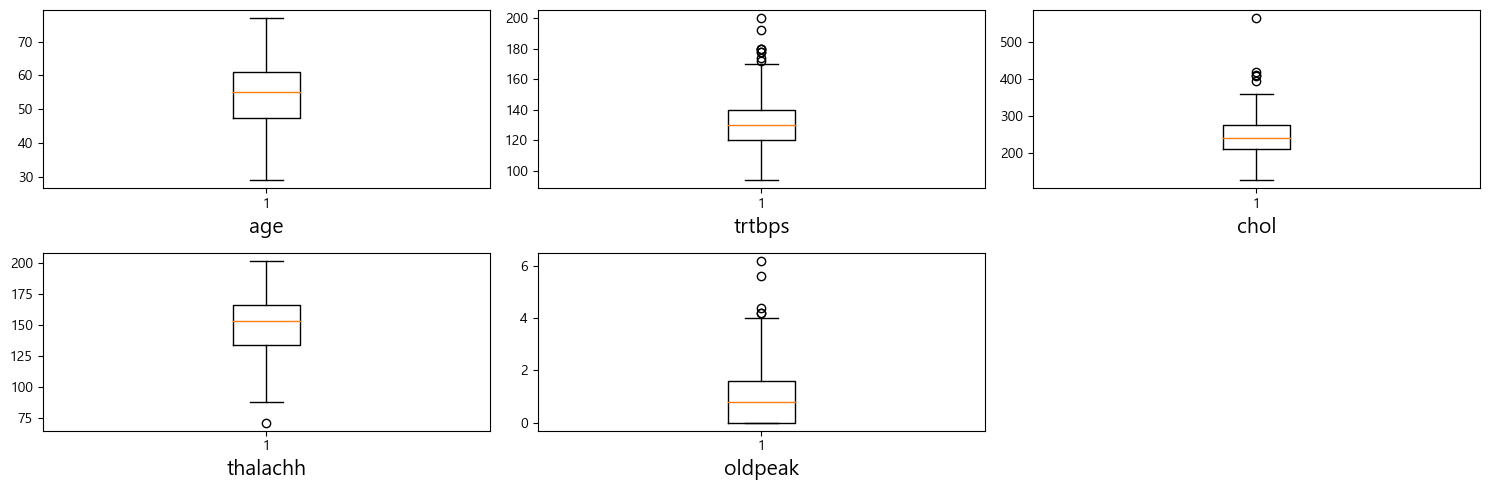

In [7]:
num_index = ['age','trtbps','chol','thalachh','oldpeak','caa']

plt.figure(figsize= (15,5))

for i in range(5) :
    plt.subplot(2,3,i+1)
    plt.boxplot(df[num_index[i]])
    plt.xlabel(num_index[i], fontsize= 15)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
    plt.tight_layout()
    
plt.show()   

In [8]:
df[df['chol'] > 500]['chol'].count()

1

In [9]:
df = df[df['chol'] < 500]
print(df[df['chol'] > 500]['chol'].count())
df.head(2)

0


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


## Distribution

In [10]:
df_0 = df[df['output'] == 0]
df_1 = df[df['output'] == 1]

In [11]:
num_index = ['age','trtbps','chol','thalachh','oldpeak','caa']

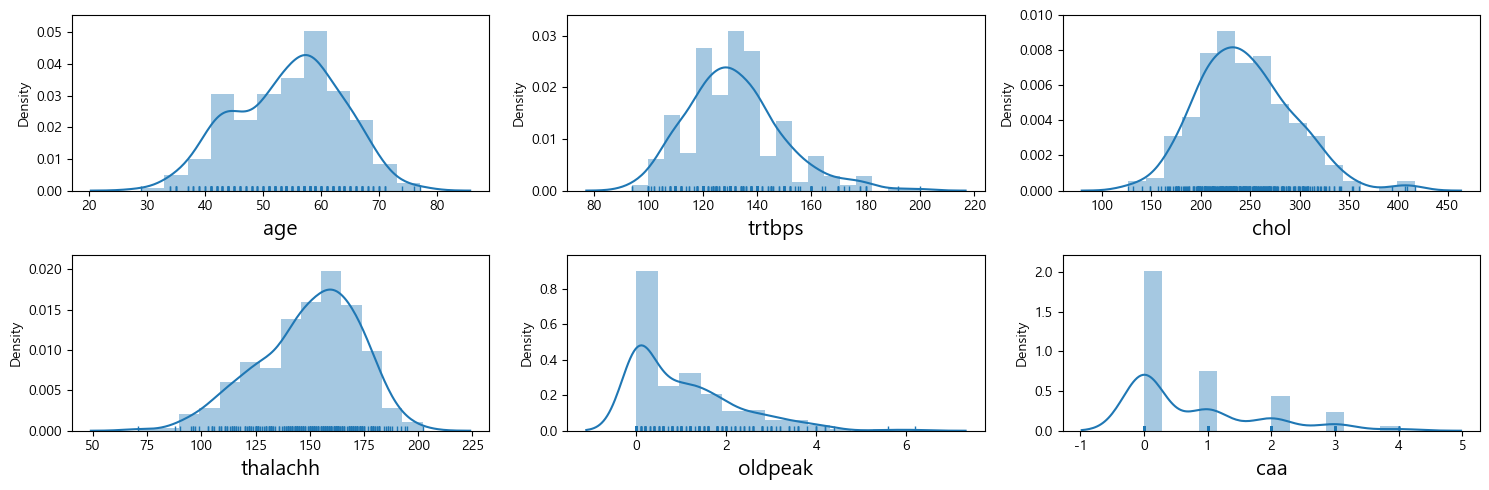

In [12]:
plt.figure(figsize= (15,5))

for i in range(6) :
    plt.subplot(2,3,i+1)
    sns.distplot(df[num_index[i]], hist= True, rug= True)
    plt.xlabel(num_index[i], fontsize= 15)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
    plt.tight_layout()
    
plt.show()   

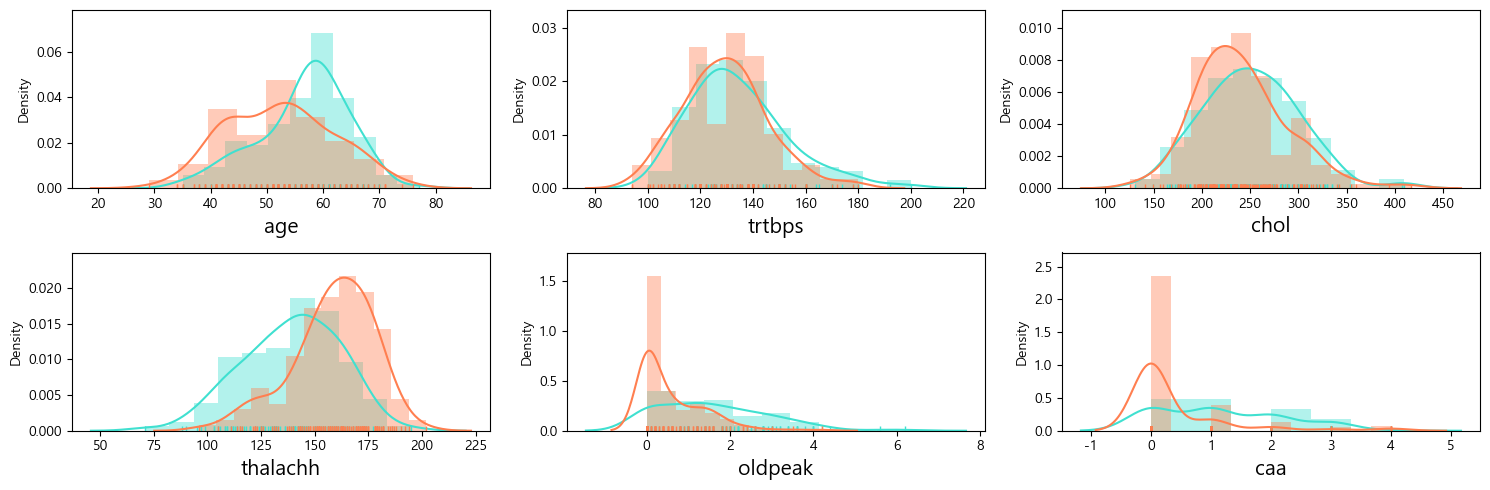

In [13]:
plt.figure(figsize= (15,5))

for i in range(6) :
    plt.subplot(2,3,i+1)
    sns.distplot(df_0[num_index[i]], hist= True, rug= True, color= 'turquoise')
    sns.distplot(df_1[num_index[i]], hist= True, rug= True, color= 'coral')
    plt.xlabel(num_index[i], fontsize= 15)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
    plt.tight_layout()
    
plt.show()   

## Categorical Features

In [14]:
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [15]:
obj_index = ['sex','cp','fbs','restecg','exng','slp','caa','thall']

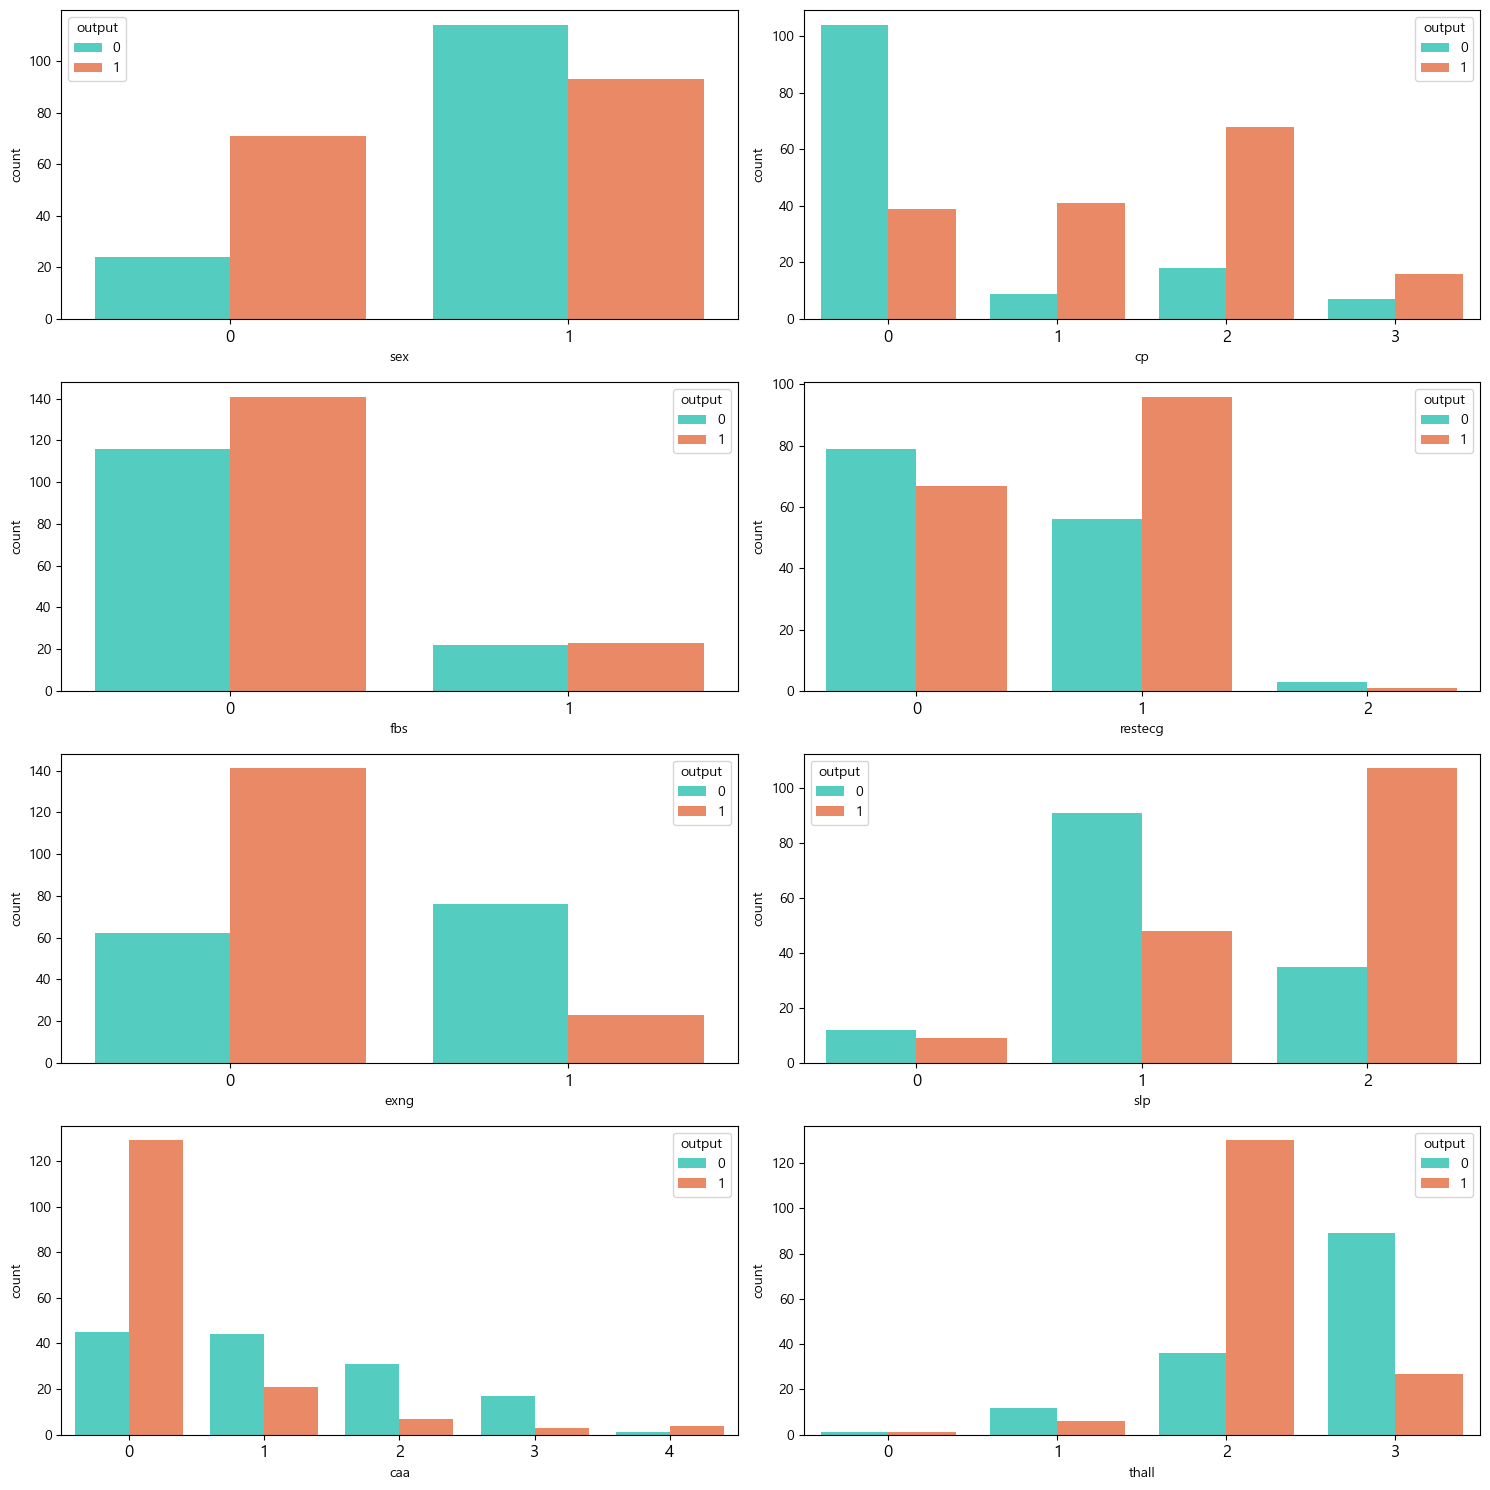

In [16]:
plt.figure(figsize= (15,15))

for i in range(8) :
    plt.subplot(4,2,i+1)
    sns.set_palette(sns.color_palette(['turquoise','coral']))
    sns.countplot(x= obj_index[i], hue= 'output', data= df)
    plt.xticks(fontsize= 12)
    plt.tight_layout()

plt.show()

## Target

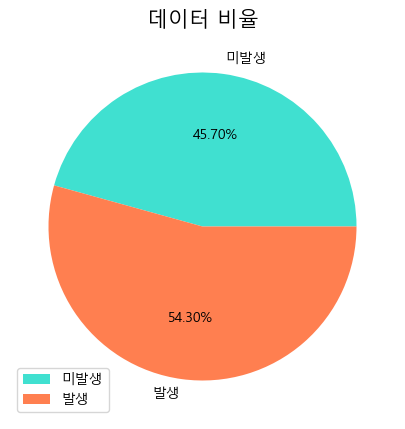

1    164
0    138
Name: output, dtype: int64


In [17]:
plt.figure(figsize = (10,5))

df_count = df.groupby(['output']).size()
plt.pie(df_count,
        labels = ['미발생','발생'],
        autopct = '%.2f%%',
        colors = ['turquoise','coral'])
plt.title('데이터 비율', fontsize = 15)

plt.legend(loc= 'lower left')
plt.show()

print(df['output'].value_counts())

## Correlation

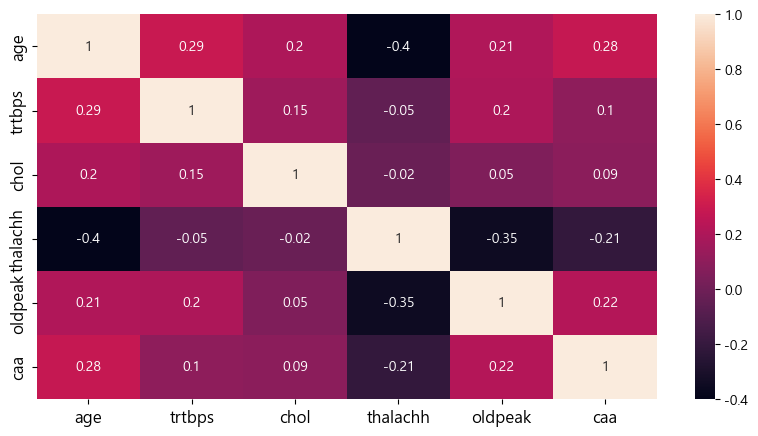

In [18]:
df_num = df[num_index]

plt.figure(figsize= (10,5))

sns.heatmap(df_num.corr().round(2), annot= True, annot_kws= {'size':10})
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

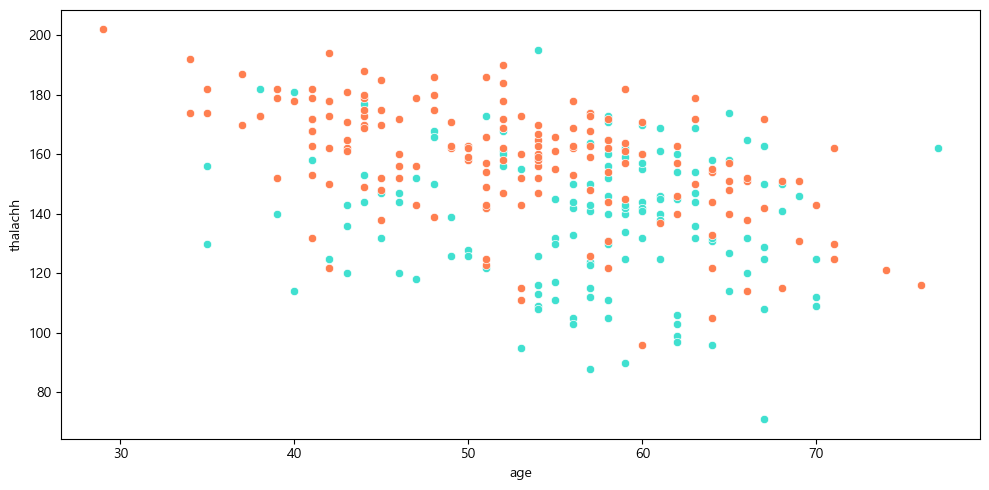

In [19]:
plt.figure(figsize= (10,5))

sns.scatterplot(x= 'age', y= 'thalachh', data= df_0, color= 'turquoise')
sns.scatterplot(x= 'age', y= 'thalachh', data= df_1, color= 'coral')
plt.tight_layout()

plt.show()

In [20]:
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


# Feature Engineering

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


## Categorical Features

In [22]:
df = df.astype({'output':'category',
                'sex':'category',
                'cp':'category',
                'fbs':'category',
                'restecg':'category',
                'exng':'category',
                'slp':'category',
                'caa':'category',
                'thall':'category'})
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    int64   
 1   sex       302 non-null    category
 2   cp        302 non-null    category
 3   trtbps    302 non-null    int64   
 4   chol      302 non-null    int64   
 5   fbs       302 non-null    category
 6   restecg   302 non-null    category
 7   thalachh  302 non-null    int64   
 8   exng      302 non-null    category
 9   oldpeak   302 non-null    float64 
 10  slp       302 non-null    category
 11  caa       302 non-null    category
 12  thall     302 non-null    category
 13  output    302 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 18.2 KB


# Target, Features

In [24]:
X = df.drop('output', axis= 1)
Y = df['output']
print(X.shape, Y.shape)

(302, 13) (302,)


# Encoding

In [25]:
X_dummy = pd.get_dummies(X)
print('X :', X.shape)
print('X_dummies :', X_dummy.shape)
print('Y :',Y.shape)

X : (302, 13)
X_dummies : (302, 30)
Y : (302,)


# Data Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# train / test
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y,
                                                    test_size= 0.2,
                                                    shuffle= True,
                                                    random_state= 7)
# train / val
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                  shuffle= True,
                                                  test_size= 0.2,
                                                  random_state= 7)

# Scaling

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [29]:
X_train.head(2)

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
278,58,136,319,152,0.0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
83,52,152,298,178,1.2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [30]:
ss = StandardScaler()
ms = MinMaxScaler()

ss_col = ['trtbps','chol','thalachh']
X_train[ss_col] = ss.fit_transform(X_train[ss_col])
X_val[ss_col] = ss.transform(X_val[ss_col])
X_test[ss_col] = ss.transform(X_test[ss_col])

ms_col = ['age','oldpeak']
X_train[ms_col] = ms.fit_transform(X_train[ms_col])
X_val[ms_col] = ms.transform(X_val[ms_col])
X_test[ms_col] = ms.transform(X_test[ms_col])

X_train.head(2)

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
278,0.604167,0.203790,1.495651,0.098299,0.000000,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
83,0.479167,1.142383,1.060458,1.275054,0.285714,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


# Modeling

## Voting

In [31]:
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [32]:
pipe_list = [('model', VotingClassifier(estimators= [('DT', DecisionTreeClassifier()),
                                                     ('RF', RandomForestClassifier())],
                                        voting= 'hard'))]
pipe_model = Pipeline(pipe_list)

In [33]:
hp = {'model__DT__max_depth':range(5,10),
      'model__DT__min_samples_split':range(5,10),
      'model__DT__min_samples_leaf':range(5,10),
      'model__DT__class_weight':['balanced'],
      'model__RF__max_depth':[5],
      'model__RF__min_samples_split':[2,4,6],
      'model__RF__min_samples_leaf':[8],
      'model__RF__class_weight':['balanced'],
      'model__RF__n_estimators':[50]}

In [34]:
import time
start_time = time.time()

grid_model = GridSearchCV(pipe_model,
                          param_grid= hp,
                          cv= 3,
                          n_jobs= -1,
                          scoring= 'f1')
grid_model.fit(X_train, Y_train)

print('수행 시간 : {:.0f} 분 {:.0f} 초\n'.format((time.time() - start_time) // 60, (time.time() - start_time) % 60))

수행 시간 : 0 분 8 초



In [35]:
best_model = grid_model.best_estimator_

In [36]:
from sklearn.metrics import classification_report

In [37]:
train_pred = best_model.predict(X_train)

print(classification_report(Y_train, train_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        89
           1       0.92      0.78      0.84       103

    accuracy                           0.84       192
   macro avg       0.85      0.85      0.84       192
weighted avg       0.86      0.84      0.84       192



In [38]:
val_pred = best_model.predict(X_val)

print(classification_report(Y_val, val_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.96      0.87      0.91        30

    accuracy                           0.90        49
   macro avg       0.89      0.91      0.90        49
weighted avg       0.91      0.90      0.90        49



In [39]:
test_pred = best_model.predict(X_test)

print(classification_report(Y_test, test_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.89      0.81      0.85        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

